In [12]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  
nltk.download('stopwords') 

df = pd.read_csv('yugam_Ai_chat.csv')

df['query'] = df['query'].str.lower()
df['response'] = df['response'].str.lower()

def remove_stopwords(text):
    words = word_tokenize(text)
    
    first_exclamation_index = text.find('!')
    
    if first_exclamation_index != -1:  
        text = text[first_exclamation_index + 1:]
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['query'] = df['query'].apply(remove_stopwords)
df['response'] = df['response'].apply(remove_stopwords)


df.to_csv('cleaned_data.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  
nltk.download('stopwords')

# Load the CSV file
df = pd.read_csv('yugam_Ai_chat.csv')

# Convert text to lowercase
df['query'] = df['query'].str.lower()
df['response'] = df['response'].str.lower()

# Define a function to remove format before exclamation mark if 'hey' is present
def remove_format(text):
    if 'hey' in text:
        first_exclamation_index = text.find('!')
        if first_exclamation_index != -1:
            text = text[first_exclamation_index + 1:]
    return text.strip()

# Apply remove_format function to 'query' column
df['query'] = df['query'].apply(remove_format)

# Remove rows where the query consists only of "hi", "hii", or "hey"
df = df[~df['query'].isin(['hi', 'hii', 'hey'])]

# Define a function to remove words before comma if 'hey' or 'hi' is present
def remove_words_before_comma(text):
    if 'hey' in text or 'hi' in text:
        first_comma_index = text.find(',')
        if first_comma_index != -1:
            text = text[first_comma_index + 1:]
    return text.strip()

# Apply remove_words_before_comma function to 'response' column
df['response'] = df['response'].apply(remove_words_before_comma)

# Remove specific words from the text


# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
import pandas as pd
import re

df = pd.read_csv('cleaned_data.csv')

phrases_to_group = [
    'sorry', 
    "i don't have", 
    "i am not sure about", 
    "i don't have access",
    "i cannot provide", 
    "i am unable to provide", 
    "i am unable to retrieve",
    "i am not able to retrieve",
    "i do not have access to",
    "i am not able to find",
    "i am not able to access",
    "i am not able to locate",
    "i do not have the information",
    "i am not able to find the information",
    "i am not able to access the information",
    "i am not able to locate the information",
    "i am not able to provide the information",
    "i am not able to retrieve the information"
]

pattern = r'\b(?:' + '|'.join(phrases_to_group) + r')(?:\b|\s\w+\b)'

grouped_responses_df = df[df['response'].str.contains(pattern, case=False, regex=True)]

grouped_responses_df.to_csv('grouped_responses.csv', index=False)


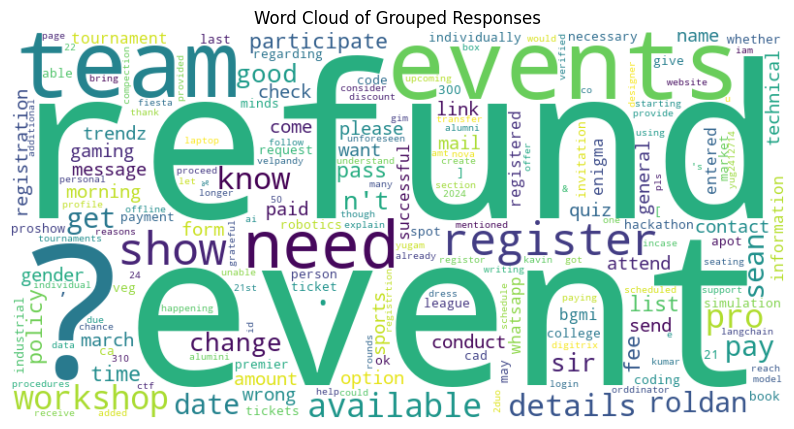

In [102]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('grouped_responses.csv')
stop_words = set(stopwords.words('english'))
specific_words = set([ 'of', 'how', 'me', 'to', 'for', 'in'])

def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

grouped_responses_df['query'] = df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a dictionary to count the frequency of each word
word_freq = {}
for word in words:
    word_freq[word] = word_freq.get(word, 0) + 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


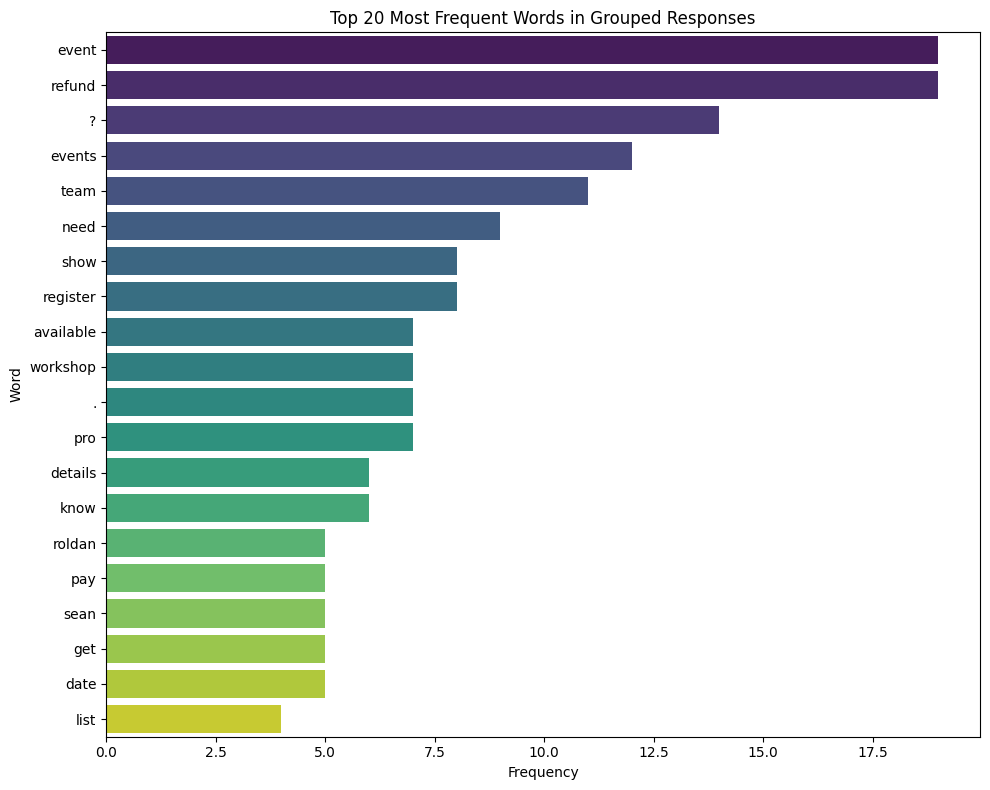

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('grouped_responses.csv')
stop_words = set(stopwords.words('english'))
specific_words = set([ 'of', 'how', 'me', 'to', 'for', 'in'])

def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

grouped_responses_df['query'] = df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


In [109]:
df=pd.read_csv("grouped_responses.csv")
df.shape

(134, 5)

In [110]:
import pandas as pd
import re

df = pd.read_csv('cleaned_data.csv')

money_keywords = ['buy', 'how much', 'charge', 'pay', 'fee', 'rs', 'rupees', 'money', 'price', 'cost', 'amount']

pattern = r'\b(?:' + '|'.join(money_keywords) + r')(?:\b|\s\w+\b)'

money_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]
print(money_related_queries_df.shape)
money_related_queries_df.to_csv('money_related_queries.csv', index=False)


(56, 5)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


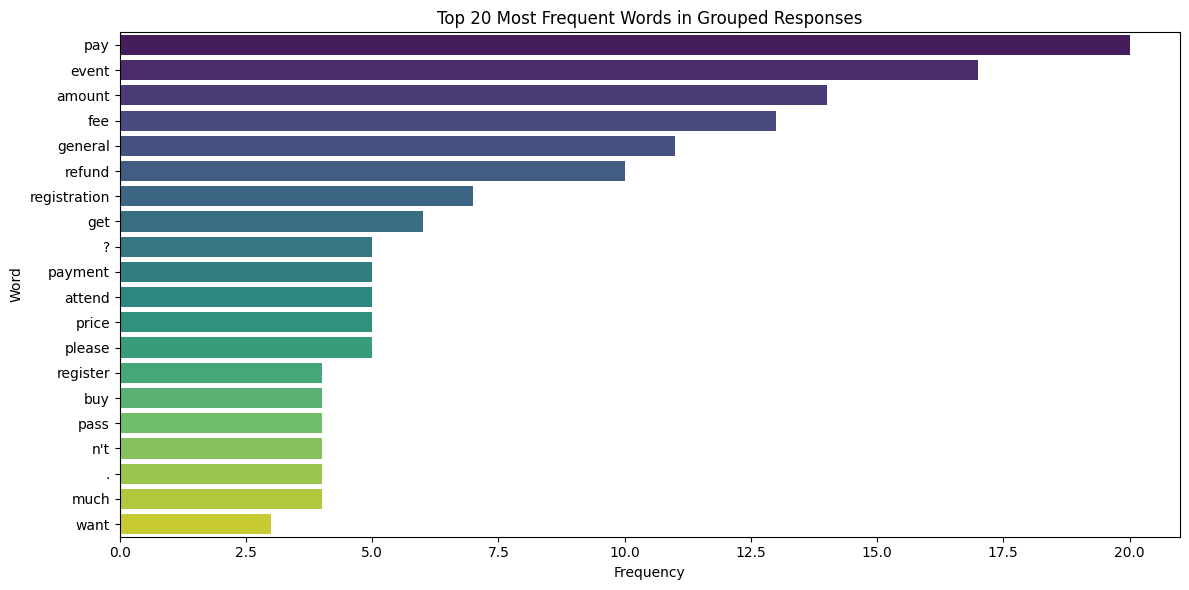

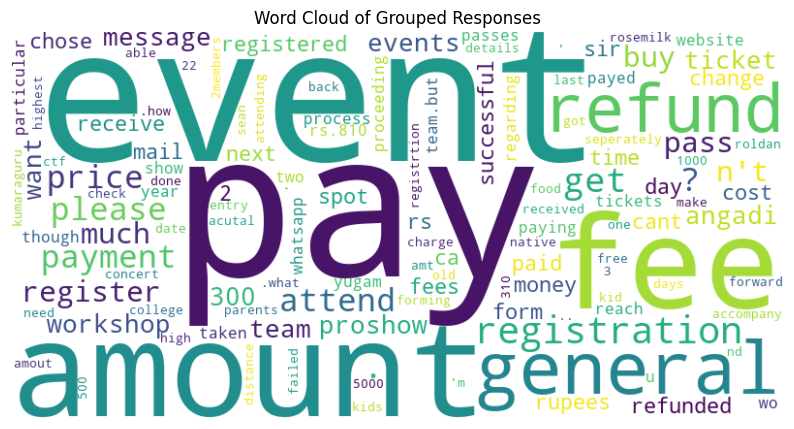

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
money_related_queries = pd.read_csv('money_related_queries.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
money_related_queries['query'] = money_related_queries['query'].apply(remove_specific_words)
money_related_queries['response'] = money_related_queries['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(money_related_queries['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


In [113]:
import pandas as pd
import re

df = pd.read_csv('cleaned_data.csv')

certificate_keywords = ['certificate', 'certification', 'certify', 'course completion', 'completion', 'completion certificate', 'certified']

pattern = r'\b(?:' + '|'.join(certificate_keywords) + r')(?:\b|\s\w+\b)'

certificate_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]
print(certificate_related_queries_df.shape)
certificate_related_queries_df.to_csv('certificate_related_queries.csv', index=False)


(97, 5)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


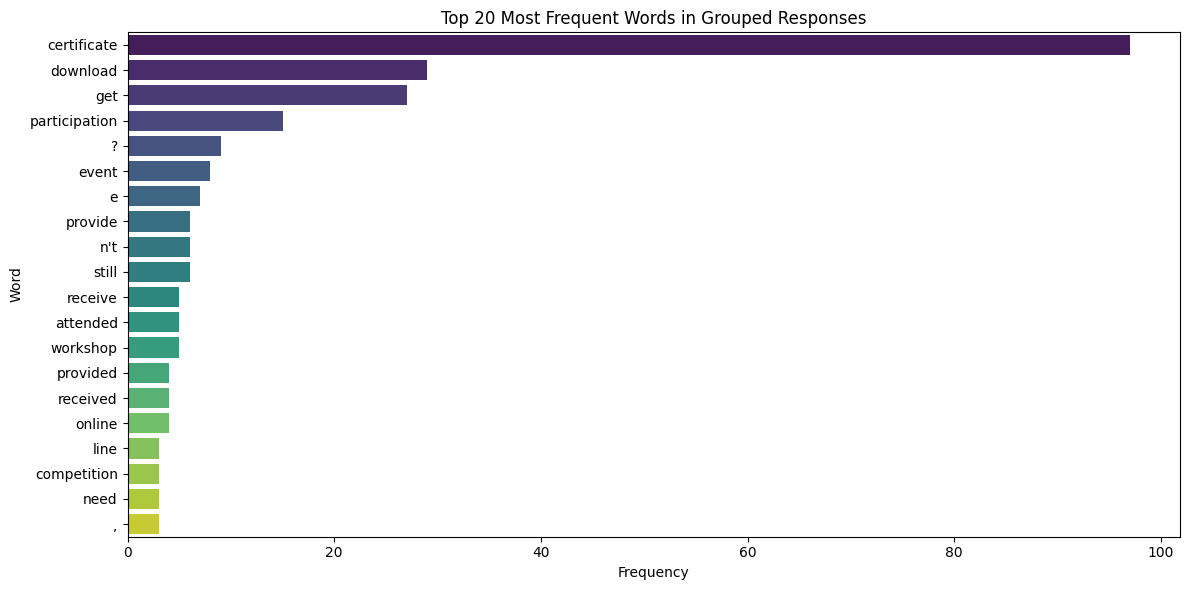

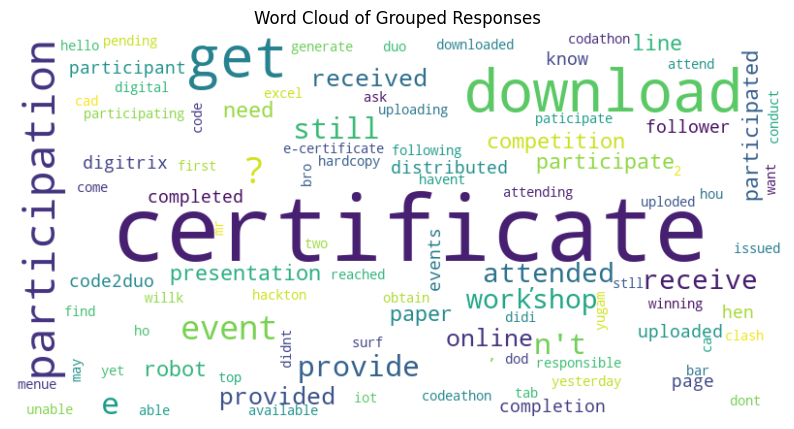

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('certificate_related_queries.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
grouped_responses_df['query'] = grouped_responses_df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = grouped_responses_df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


In [29]:
import pandas as pd
import re

df = pd.read_csv('grouped_responses.csv')

certificate_keywords = ['certificate', 'certification', 'certify', 'course completion', 'completion', 'completion certificate', 'certified']

pattern = r'\b(?:' + '|'.join(certificate_keywords) + r')(?:\b|\s\w+\b)'

certificate_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]
print(certificate_related_queries_df.shape)
certificate_related_queries_df.to_csv('certificate_related_queries_that_with_iirelevent_answer.csv', index=False)


(19, 5)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


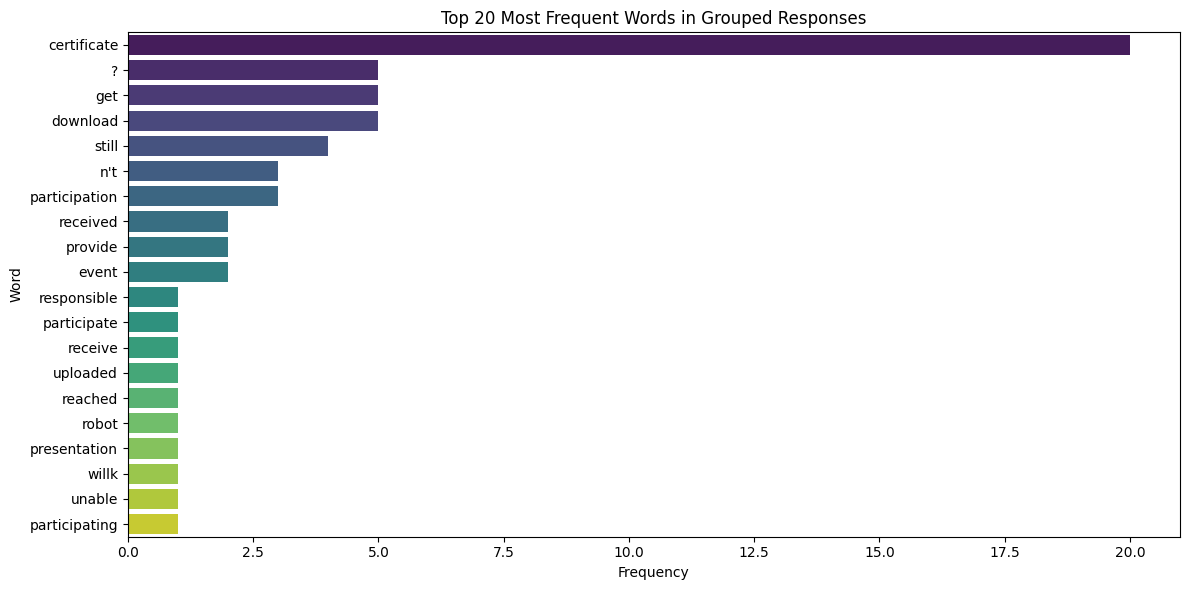

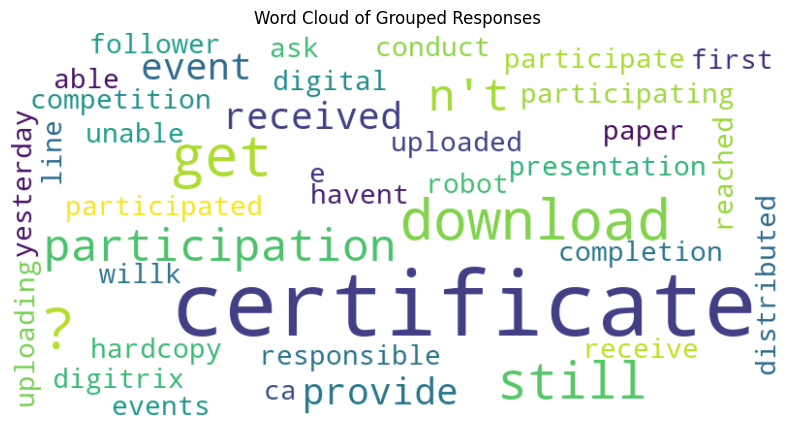

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('certificate_related_queries_that_with_iirelevent_answer.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
grouped_responses_df['query'] = grouped_responses_df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = grouped_responses_df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


In [30]:
import pandas as pd
import re

df = pd.read_csv('cleaned_data.csv')

time_keywords = ['time', 'timing', 'schedule', 'date', 'day', 'start', 'end', 'hour', 'minute', 'second']

pattern = r'\b(?:' + '|'.join(time_keywords) + r')(?:\b|\s\w+\b)'

time_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]

time_related_queries_df.to_csv('time_related_queries.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


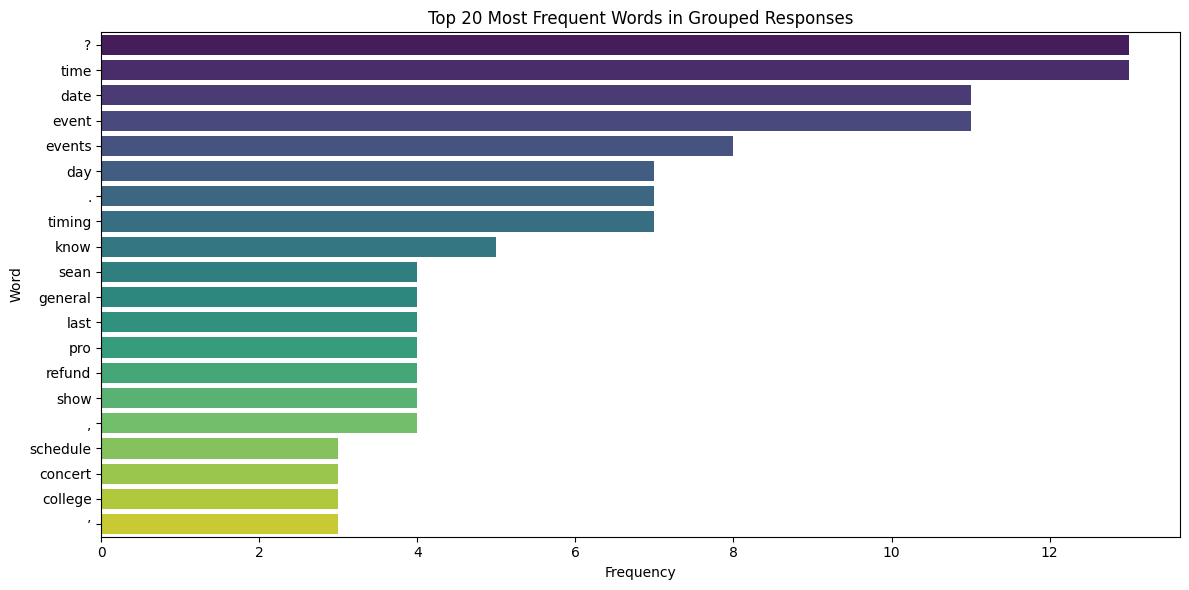

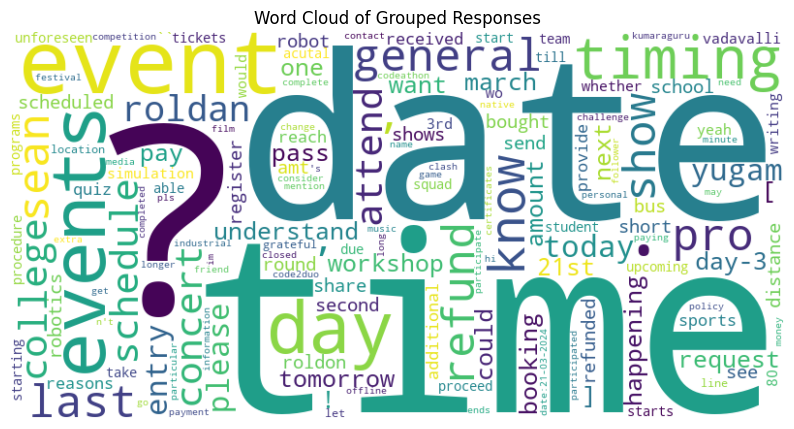

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('time_related_queries.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
grouped_responses_df['query'] = grouped_responses_df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = grouped_responses_df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


In [44]:
import pandas as pd
import re

df = pd.read_csv('grouped_responses.csv')

list_keywords = ['list', 'all', 'mention', 'some', 'say']

pattern = r'\b(?:' + '|'.join(list_keywords) + r')(?:\b|\s\w+\b)'

list_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]

list_related_queries_df.to_csv('list_related_queries.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


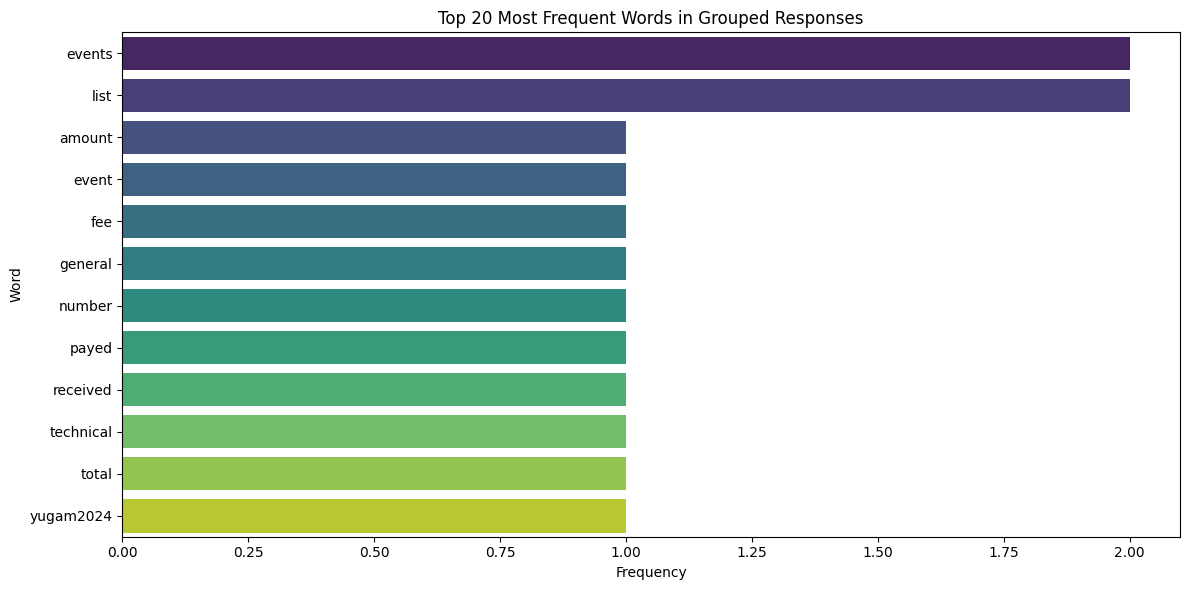

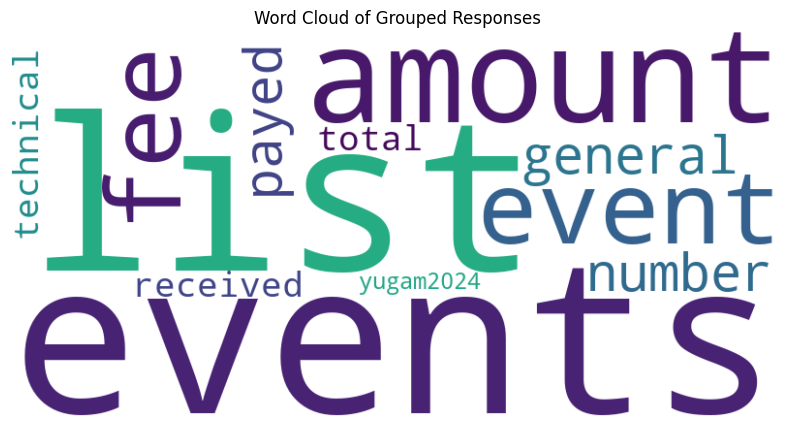

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('list_related_queries.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
grouped_responses_df['query'] = grouped_responses_df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = grouped_responses_df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()


In [43]:
import pandas as pd
import re

df = pd.read_csv('cleaned_data.csv')

list_keywords = ['list', 'all', 'mention', 'some', 'say']

pattern = r'\b(?:' + '|'.join(list_keywords) + r')(?:\b|\s\w+\b)'

list_related_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]

list_related_queries_df.to_csv('list_related_queries2.csv', index=False)

In [45]:
import pandas as pd
import re

df = pd.read_csv('grouped_responses.csv')

not_received_keywords = [
    'mail', 'ticket', 'link', 'receive', 'received', 'get', 'yet'
]

certification_keywords = [
    'certificate', 'certification', 'certify', 'certified', 'certify','certificates'
]

not_received_keywords = [keyword for keyword in not_received_keywords if keyword not in certification_keywords]

pattern = r'\b(?:' + '|'.join(map(re.escape, not_received_keywords)) + r')\b'

not_received_queries_df = df[df['query'].str.contains(pattern, case=False, regex=True)]

not_received_queries_df.to_csv('not_received_queries.csv', index=False)

print(not_received_queries_df.shape)

(30, 5)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


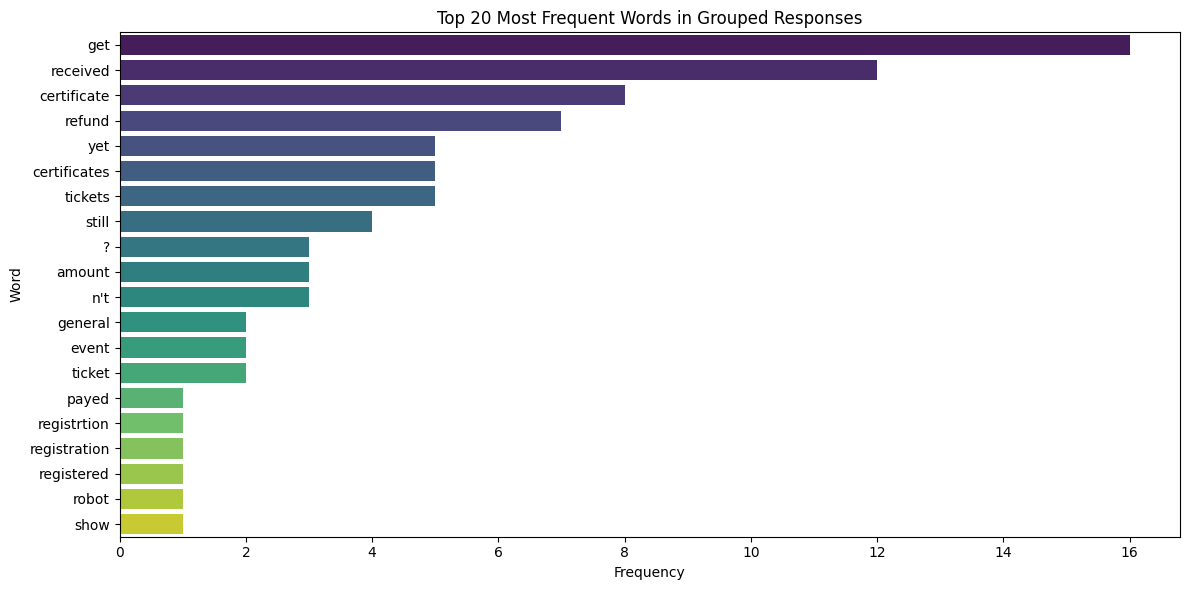

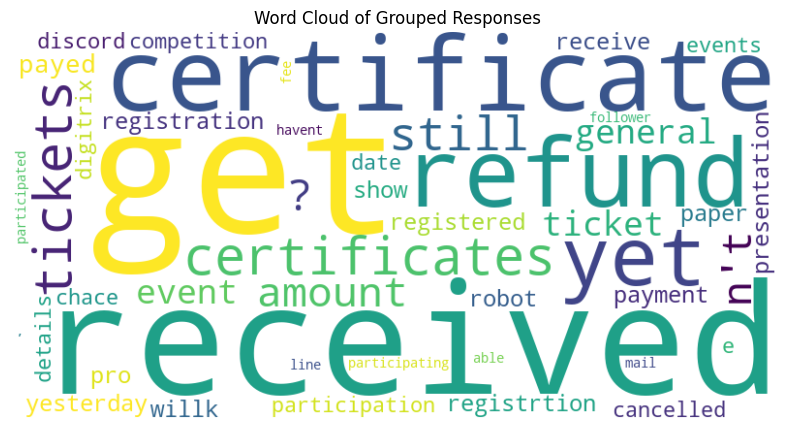

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load the grouped responses CSV file
grouped_responses_df = pd.read_csv('not_received_queries.csv')

# Download necessary NLTK resources
nltk.download('punkt')  
nltk.download('stopwords')

# Define stopwords and specific words to remove
stop_words = set(stopwords.words('english'))
specific_words = set(['of', 'how', 'me', 'to', 'for', 'in'])

# Function to remove specific words from text
def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in specific_words]
    return ' '.join(filtered_words)

# Apply text processing to 'query' and 'response' columns
grouped_responses_df['query'] = grouped_responses_df['query'].apply(remove_specific_words)
grouped_responses_df['response'] = grouped_responses_df['response'].apply(remove_specific_words)

# Concatenate all grouped responses into a single string
text = ' '.join(grouped_responses_df['query'])

# Generate a list of words
words = text.split()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(words, columns=['Word'])
word_freq_df['Frequency'] = 1

# Group by word and count frequencies
word_freq_df = word_freq_df.groupby('Word').sum().reset_index()

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Grouped Responses')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq_df['Word'], word_freq_df['Frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Grouped Responses')
plt.axis('off')
plt.show()
